In [2]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,x,y,accuracy,timestamp,place_id
0,1.5024,2.3150,65,322233,2479523047
1,4.9804,1.0712,70,157333,7735820787
2,8.4221,2.5246,83,315959,6089233511
3,1.0208,7.5442,72,162640,5286681841
4,3.6505,3.9618,15,115048,9630516218


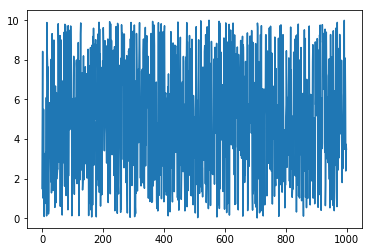

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
data['x'][:1000].plot()

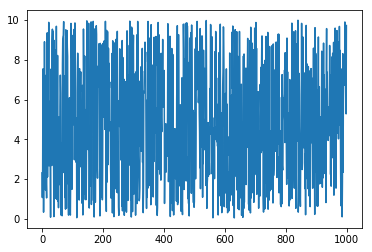

In [10]:
data['y'][:1000].plot()

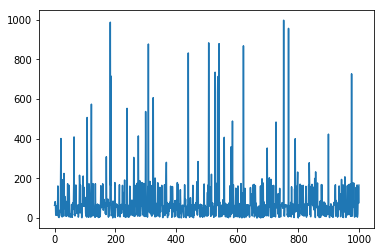

In [11]:
data['accuracy'][:1000].plot()

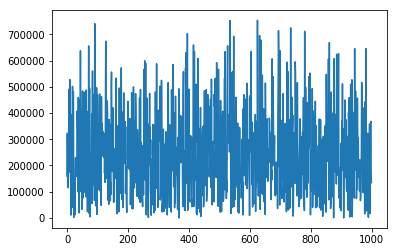

In [12]:
data['timestamp'][:1000].plot()

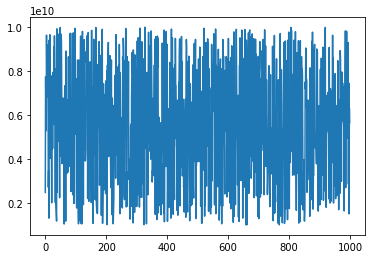

In [15]:
data['place_id'][:1000].plot()

In [105]:
type(data['place_id'][0])

numpy.int64

In [3]:
test = pd.read_csv('test.csv')
test.head()

,x,y,accuracy,timestamp
0,9.8804,0.1051,70,467760
1,3.7816,3.0745,25,419892
2,3.2631,0.1866,73,743554
3,4.7889,1.3346,74,649655
4,0.3188,4.5195,61,645038


In [7]:
import numpy as np
gist = np.zeros((10000, 10000, 5), dtype = np.int64)
nums = np.zeros((10000, 10000, 5), dtype = np.int32)
from progressbar import ProgressBar
pbar = ProgressBar(maxval=len(data))
for i in range(len(data)):
    pbar.update(i)
    x = int(round(data['x'][i] * 100))
    y = int(round(data['y'][i] * 100))
    acc = int(data['accuracy'][i])
    min_acc = 0
    min_num = 0
    find = False
    for j in range(len(gist[x, y])):
        if (gist[x, y, j] == data['place_id'][i]):
            nums[x, y, j] += acc
            find = True
            break
        if (nums[x, y, j] >= min_acc):
            min_acc = nums[x, y, j]
            min_num = j
    if (find):
        continue
    if (min_acc <= acc):
        gist[x, y, min_num] = data['place_id'][i]
        nums[x, y, min_num] = acc
pbar.finish()

100% (14416302 of 14416302) |#############| Elapsed Time: 0:46:25 Time: 0:46:25


In [ ]:
def make():
    pbar = ProgressBar(maxval=len(test))
    res = []
    for i in range(len(test)):
        pbar.update(i)
        x = int(round(test['x'][i] * 100))
        y = int(round(test['y'][i] * 100))
        acc = round(100.0 / int(test['accuracy'][i]))
        d = dict()
        for x_ in range(x - acc, x + acc + 1):
            for y_ in range(y - acc, y + acc + 1):
                for j in range(len(gist[x_, y_])):
                    if gist[x_, y_, j] not in d:
                        d[gist[x_, y_, j]] = 0
                    d[gist[x_, y_, j]] += nums[x_, y_, j]
        a1 = 0
        a2 = 0
        a3 = 0
        b1 = 0
        b2 = 0
        b3 = 0
        for elem in d:
            if (d[elem] >= b1):
                #b3 = b2
                #b2 = b1
                b1 = d[elem]
                #a3 = a2
                #a2 = a1
                a1 = elem
                continue
            '''if (d[elem] >= b2):
                b3 = b2
                b2 = d[elem]
                a3 = a2
                a2 = elem
                continue
            if (d[elem] >= b3):
                b3 = d[elem]
                a3 = elem
        if (a3 != 0):
            res.append([a1, a2, a3])
            continue
        if (a2 != 0):
            res.append([a1, a2])
            continue'''
        res.append([a1])

    pbar.finish()
make()

 16% (2417814 of 14466880) |##            | Elapsed Time: 1:20:20 ETA:  6:40:25

In [13]:
res1 = res

In [46]:
import numpy as np

def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """

    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in [actual] and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)

    if not actual:
        return 0.0

    return score

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [47]:
mapk(list(data['place_id'][10000000:]), res)

0.35436356028188304

In [ ]:
def saver(path, res):
    with open(path, 'w') as out:
        print('id,place_id', file = out)
        for i in range(len(res)):
            if (type(res[i]) != np.int64 and type(res[i]) != int):
                ans = str(i + 1) + "," + " ".join(map(str, res[i]))
            else:
                ans = str(i + 1) + "," + str(res[i])
            print(ans, file = out)

In [ ]:
saver('top_autism.csv', res)

In [ ]:
print(res[:100])

In [ ]:
autist = pd.read_csv('top_autism.csv')
autist.head()